In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Data Loading and Inspection:
 Understand the structure of the dataset.
 Identify the types of information available

In [49]:
df = pd.read_csv("/Vehicle_Insurance.csv")

print("Dataset shape:", df.shape)
df.info()
df.head()

Dataset shape: (381109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


 Data Cleaning:
 Handle missing values and outliers appropriately.

In [50]:
# Check for missing values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


<Axes: ylabel='Annual_Premium'>

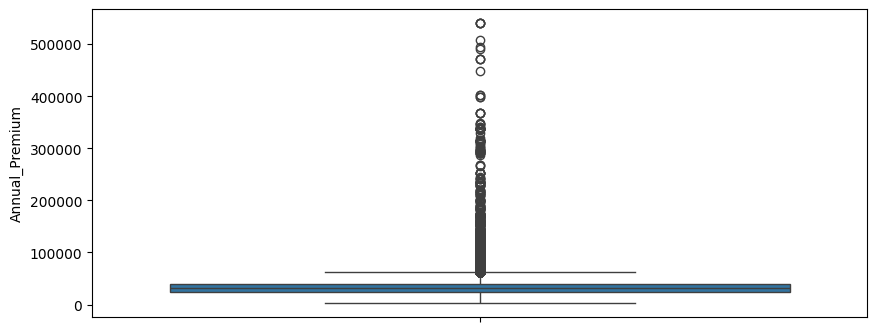

In [51]:
# Outlier detection
plt.figure(figsize=(10, 4))
sns.boxplot(df["Annual_Premium"])

In [60]:
# Handling outliers using IQR
Q1 = df["Annual_Premium"].quantile(0.25)
Q3 = df["Annual_Premium"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df=df[(df["Annual_Premium"] >= lower) & (df["Annual_Premium"] <= upper)]

<Axes: ylabel='Annual_Premium'>

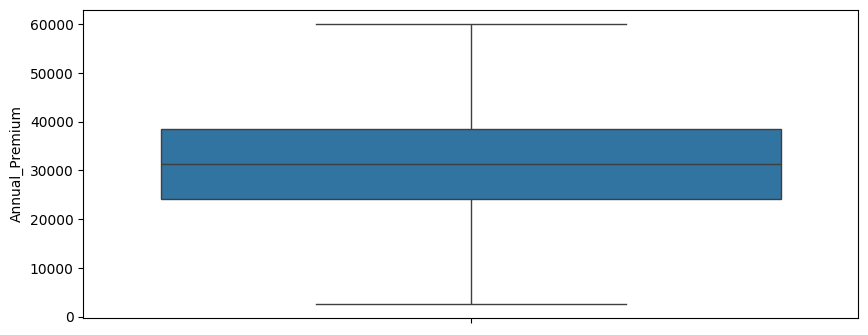

In [61]:
plt.figure(figsize=(10, 4))
sns.boxplot(df["Annual_Premium"])

<Axes: ylabel='Age'>

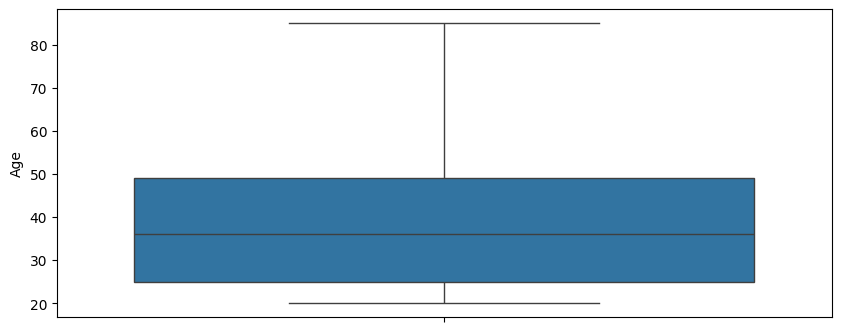

In [62]:
plt.figure(figsize=(10, 4))
sns.boxplot(df["Age"])

FUNCTION TO FIND OUTLIERS

In [63]:
#finding all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [65]:
def finding_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]  # Corrected line
    return outliers.shape[0] #to return the count of outliers

In [ ]:
# Iterate over numeric columns
for col in numeric_columns:
    num_outliers = finding_outliers(df, col) #df is the dataframe
    print(f"Column {col}: {num_outliers} outliers")

Column id: 0 outliers
Column Age: 0 outliers
Column Driving_License: 763 outliers
Column Region_Code: 0 outliers
Column Previously_Insured: 0 outliers
Column Annual_Premium: 1510 outliers
Column Policy_Sales_Channel: 0 outliers
Column Vintage: 0 outliers
Column Response: 45155 outliers


<Axes: ylabel='Driving_License'>

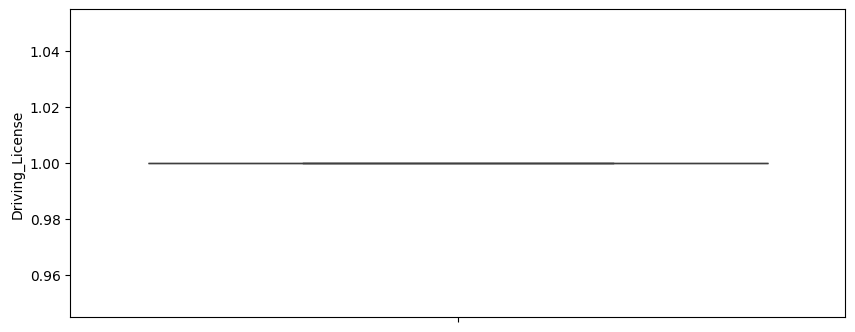

In [68]:
# Outlier detection
plt.figure(figsize=(10, 4))
sns.boxplot(df["Driving_License"])

In [67]:
# Handling outliers using IQR
Q1 = df["Driving_License"].quantile(0.25)
Q3 = df["Driving_License"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df=df[(df["Driving_License"] >= lower) & (df["Driving_License"] <= upper)]

<Axes: ylabel='Driving_License'>

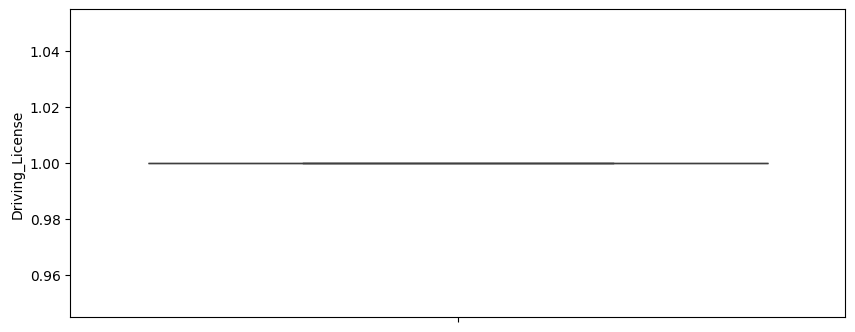

In [69]:
plt.figure(figsize=(10, 4))
sns.boxplot(df["Driving_License"])

 Data Visualization:
 Utilize various visualization techniques to explore the distribution of key
 variables.

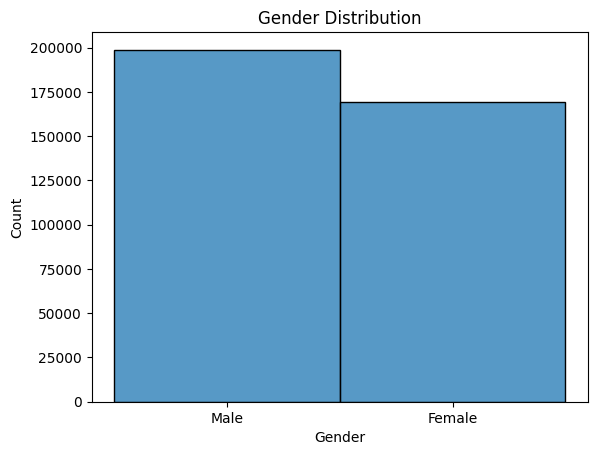

In [70]:
sns.histplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

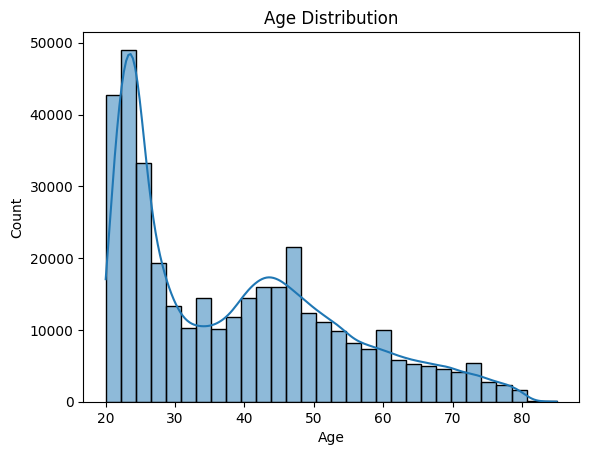

In [71]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

 Feature Analysis:
 Examine the relationship between features and the target variable (insurance
 claims).

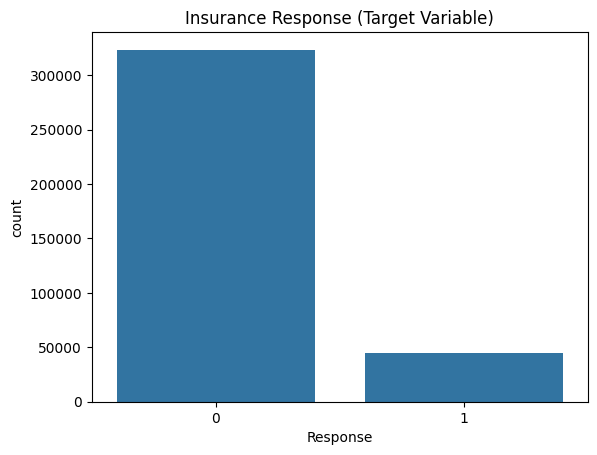

In [72]:
# Response (target variable) distribution
sns.countplot(x='Response', data=df)
plt.title('Insurance Response (Target Variable)')
plt.show()

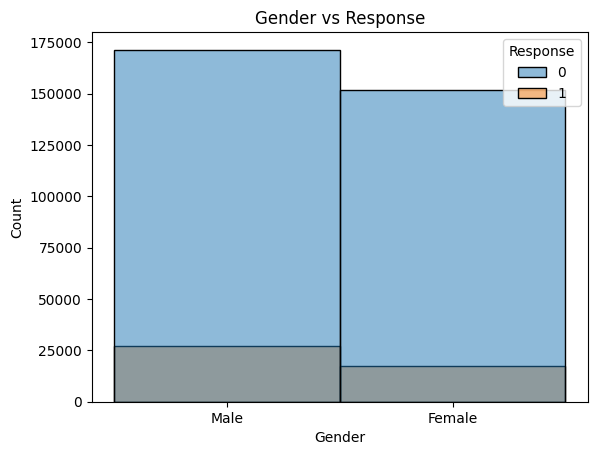

In [73]:
# Gender vs Response
sns.histplot(x='Gender', hue='Response', data=df)
plt.title('Gender vs Response')
plt.show()

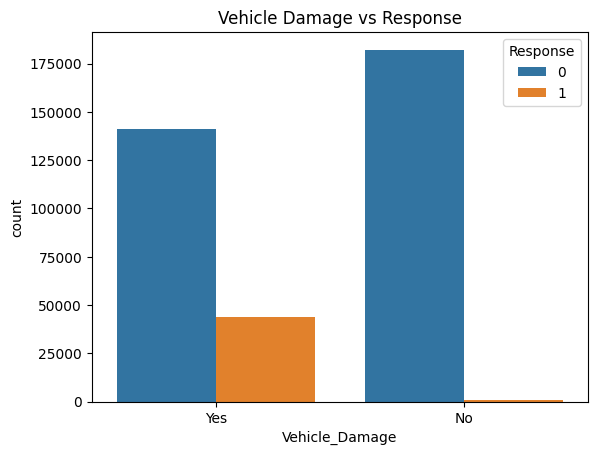

In [74]:
# Vehicle_Damage vs Response
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.title('Vehicle Damage vs Response')
plt.show()

 Age Distribution:
 Analyze the age distribution within the dataset and its impact on insurance
 claims.

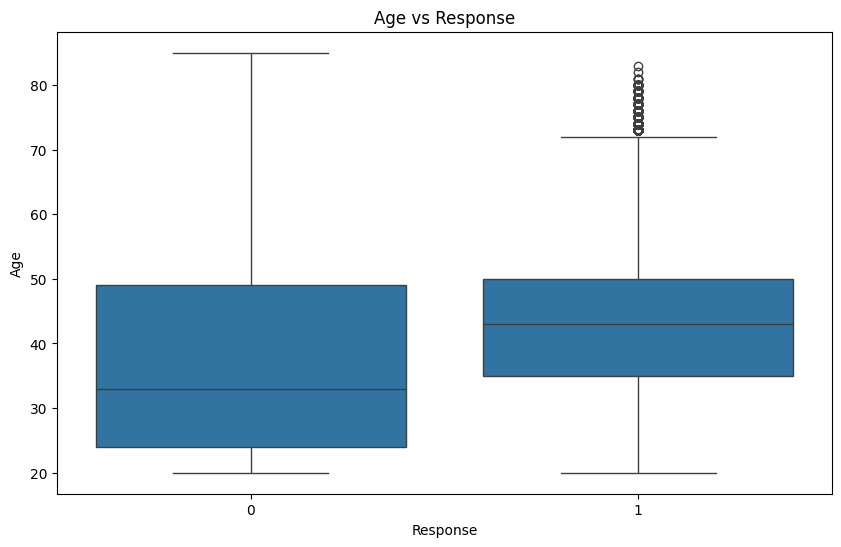

In [76]:
# Age vs Response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Response')
plt.show()

 Premium Analysis:
 Investigate the distribution of insurance premiums and their correlation with
 claim frequencies.

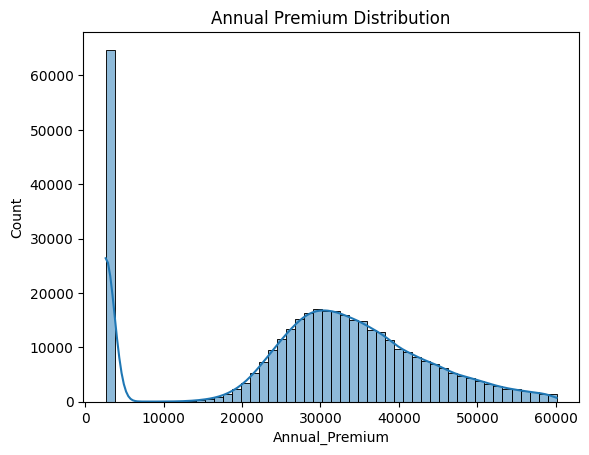

In [77]:
# Distribution of Premiums
sns.histplot(df['Annual_Premium'], bins=50, kde=True)
plt.title('Annual Premium Distribution')
plt.show()

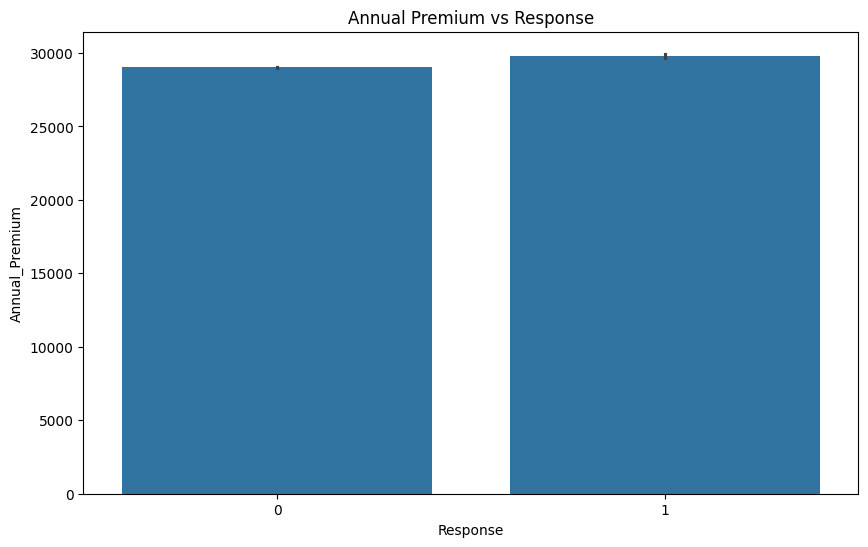

In [78]:
# Premium vs Response
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Annual_Premium', data=df)
plt.title('Annual Premium vs Response')
plt.show()

 Claim Frequencies:
 Explore factors contributing to higher claim frequencies

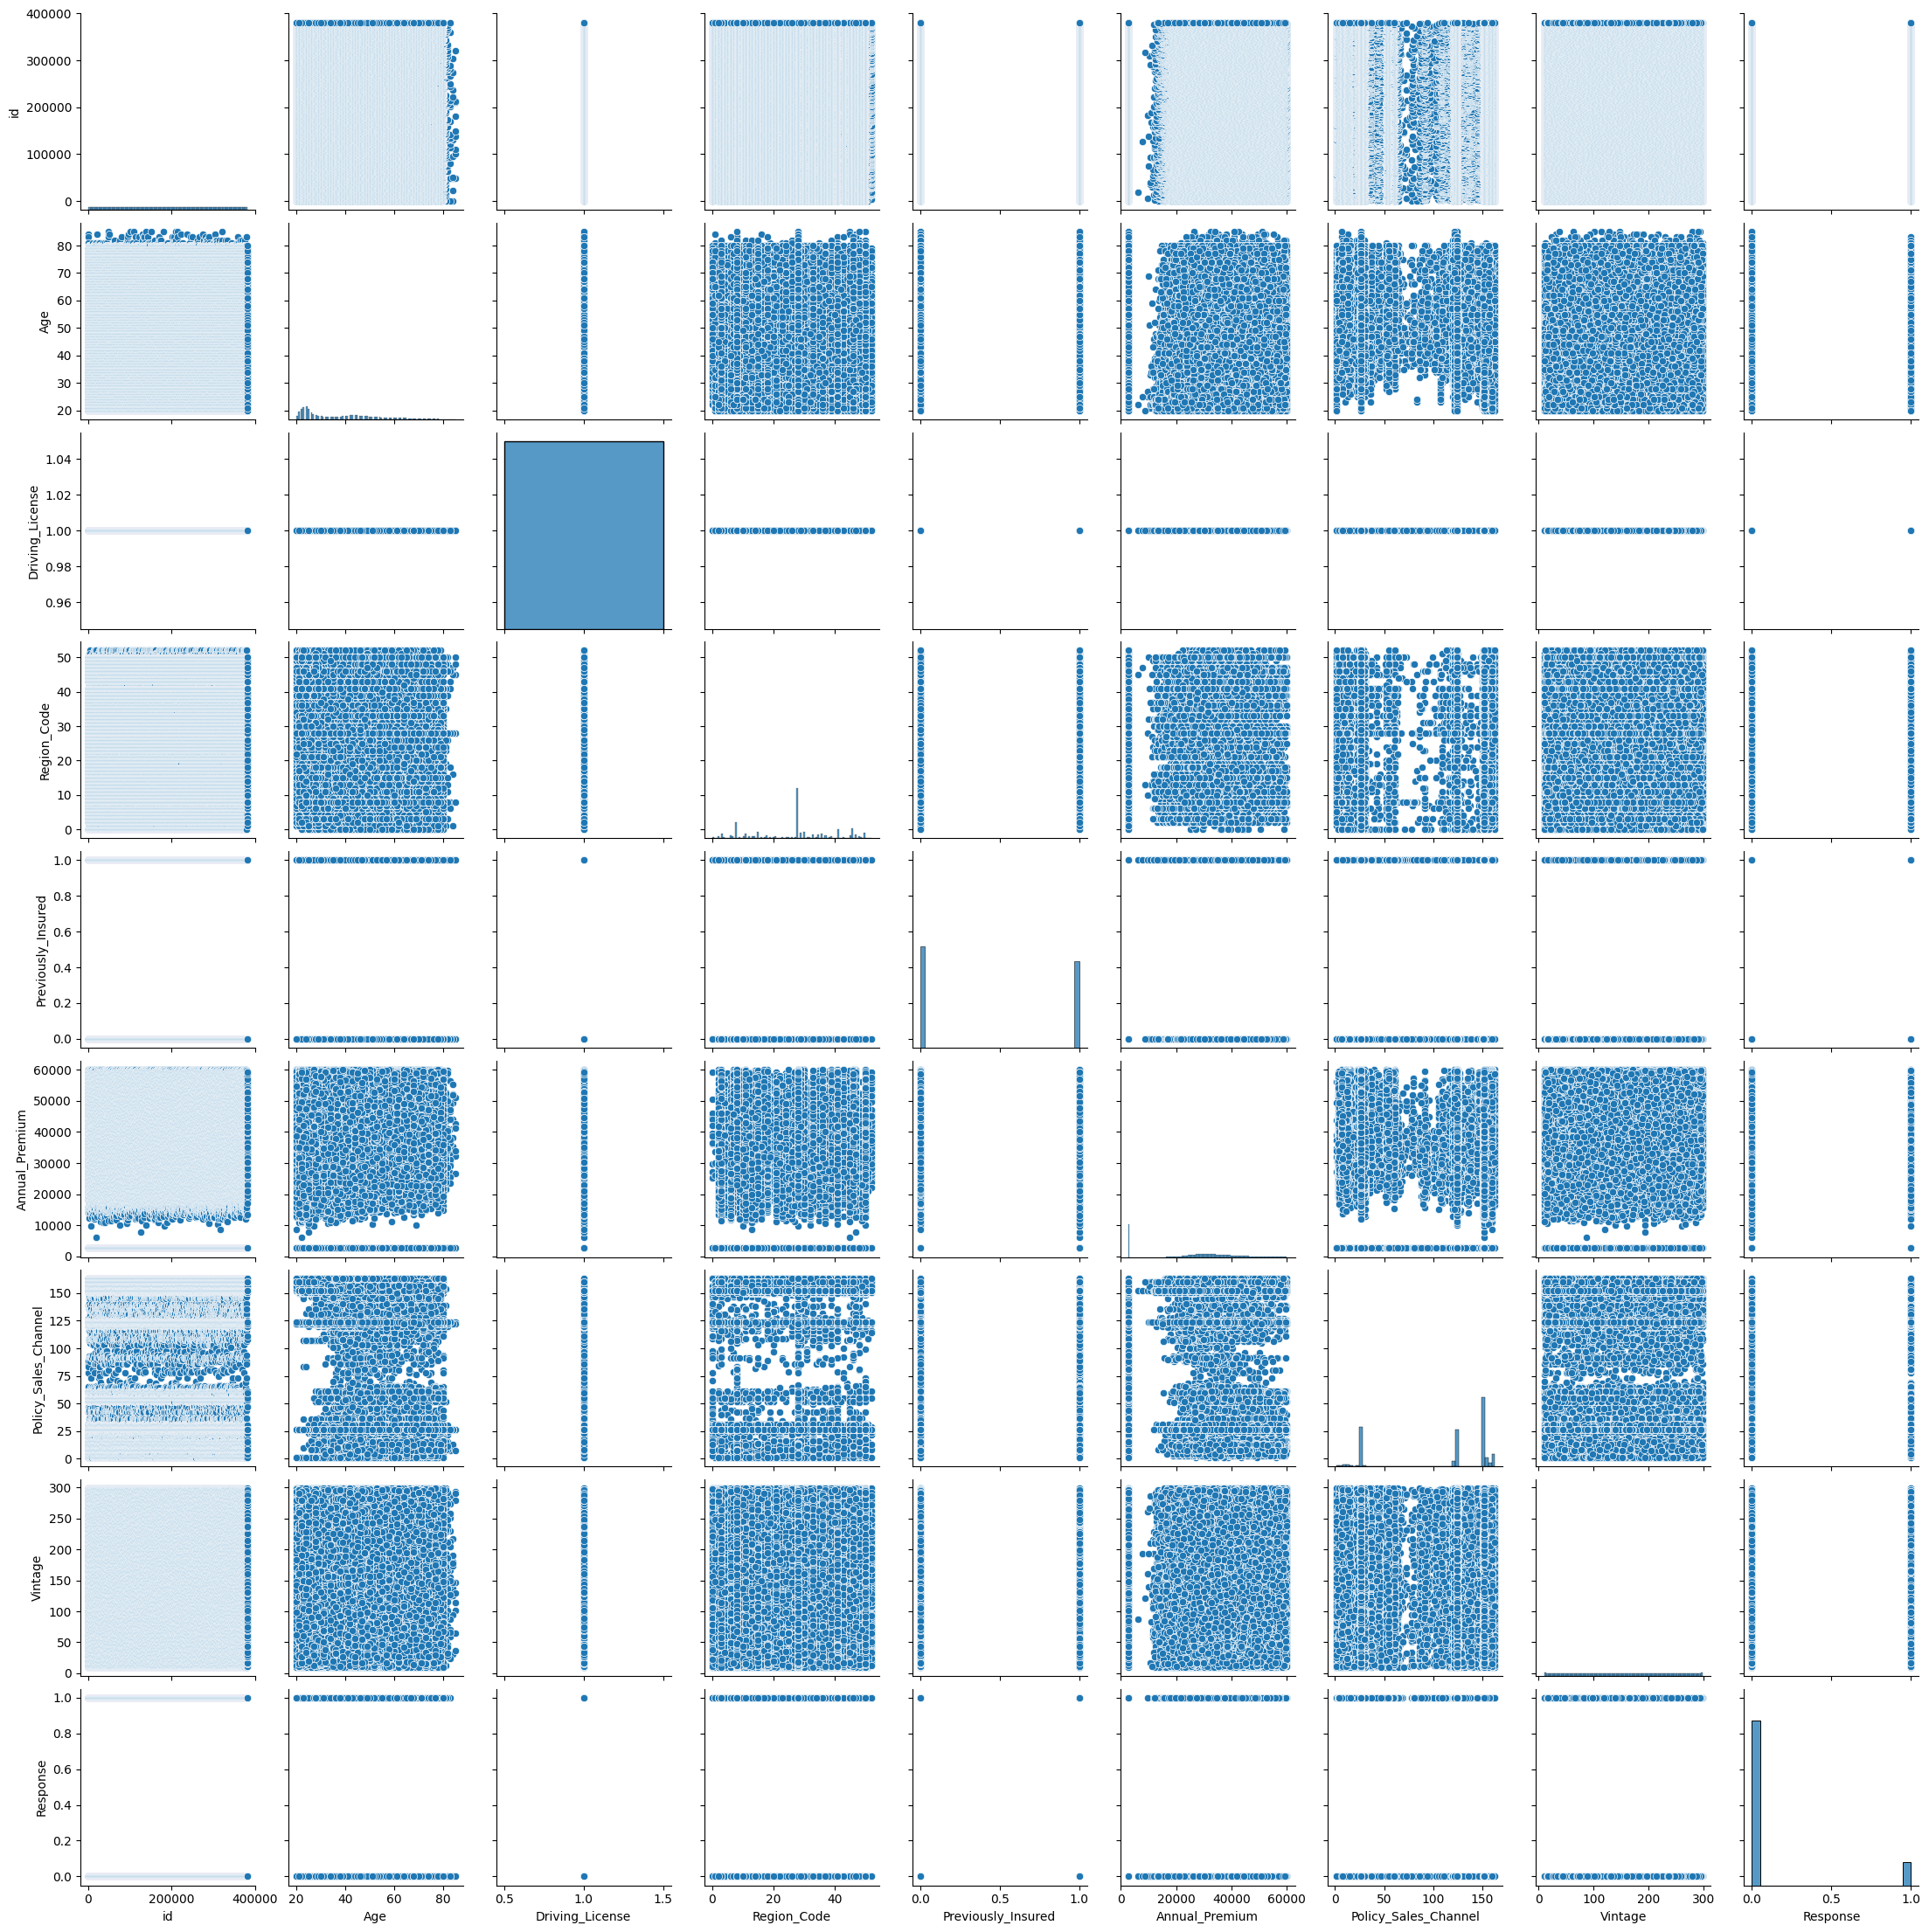

In [79]:
sns.pairplot(data=df)
plt.show()

 Gender Analysis:
 Investigate the role of gender in insurance claims.

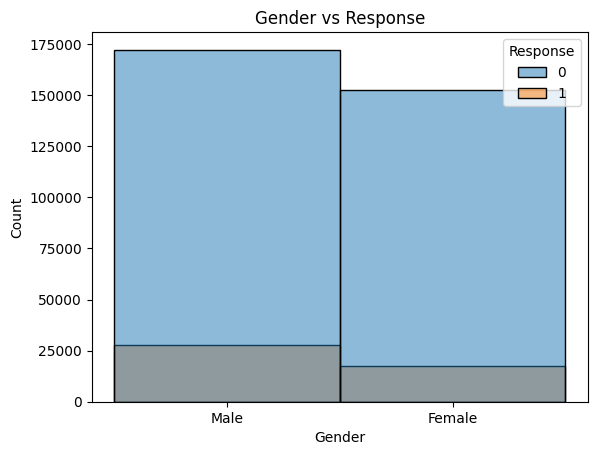

In [45]:
# Gender vs Response
sns.histplot(x='Gender', hue='Response', data=df)
plt.title('Gender vs Response')
plt.show()

 Vehicle Age and Claims:
 Examine the impact of vehicle age on the likelihood of a claim

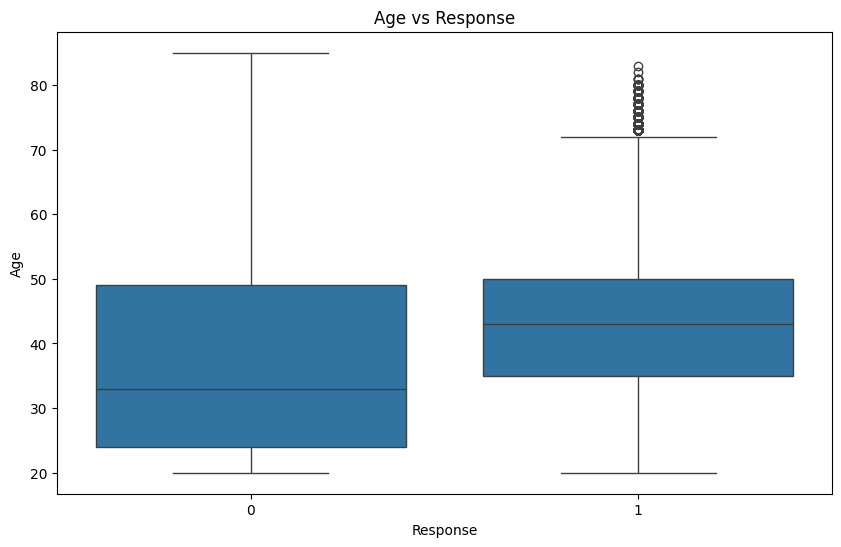

In [80]:
# Age vs Response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Response')
plt.show()

Region-wise Analysis:
 Analyze regional patterns in insurance claims.

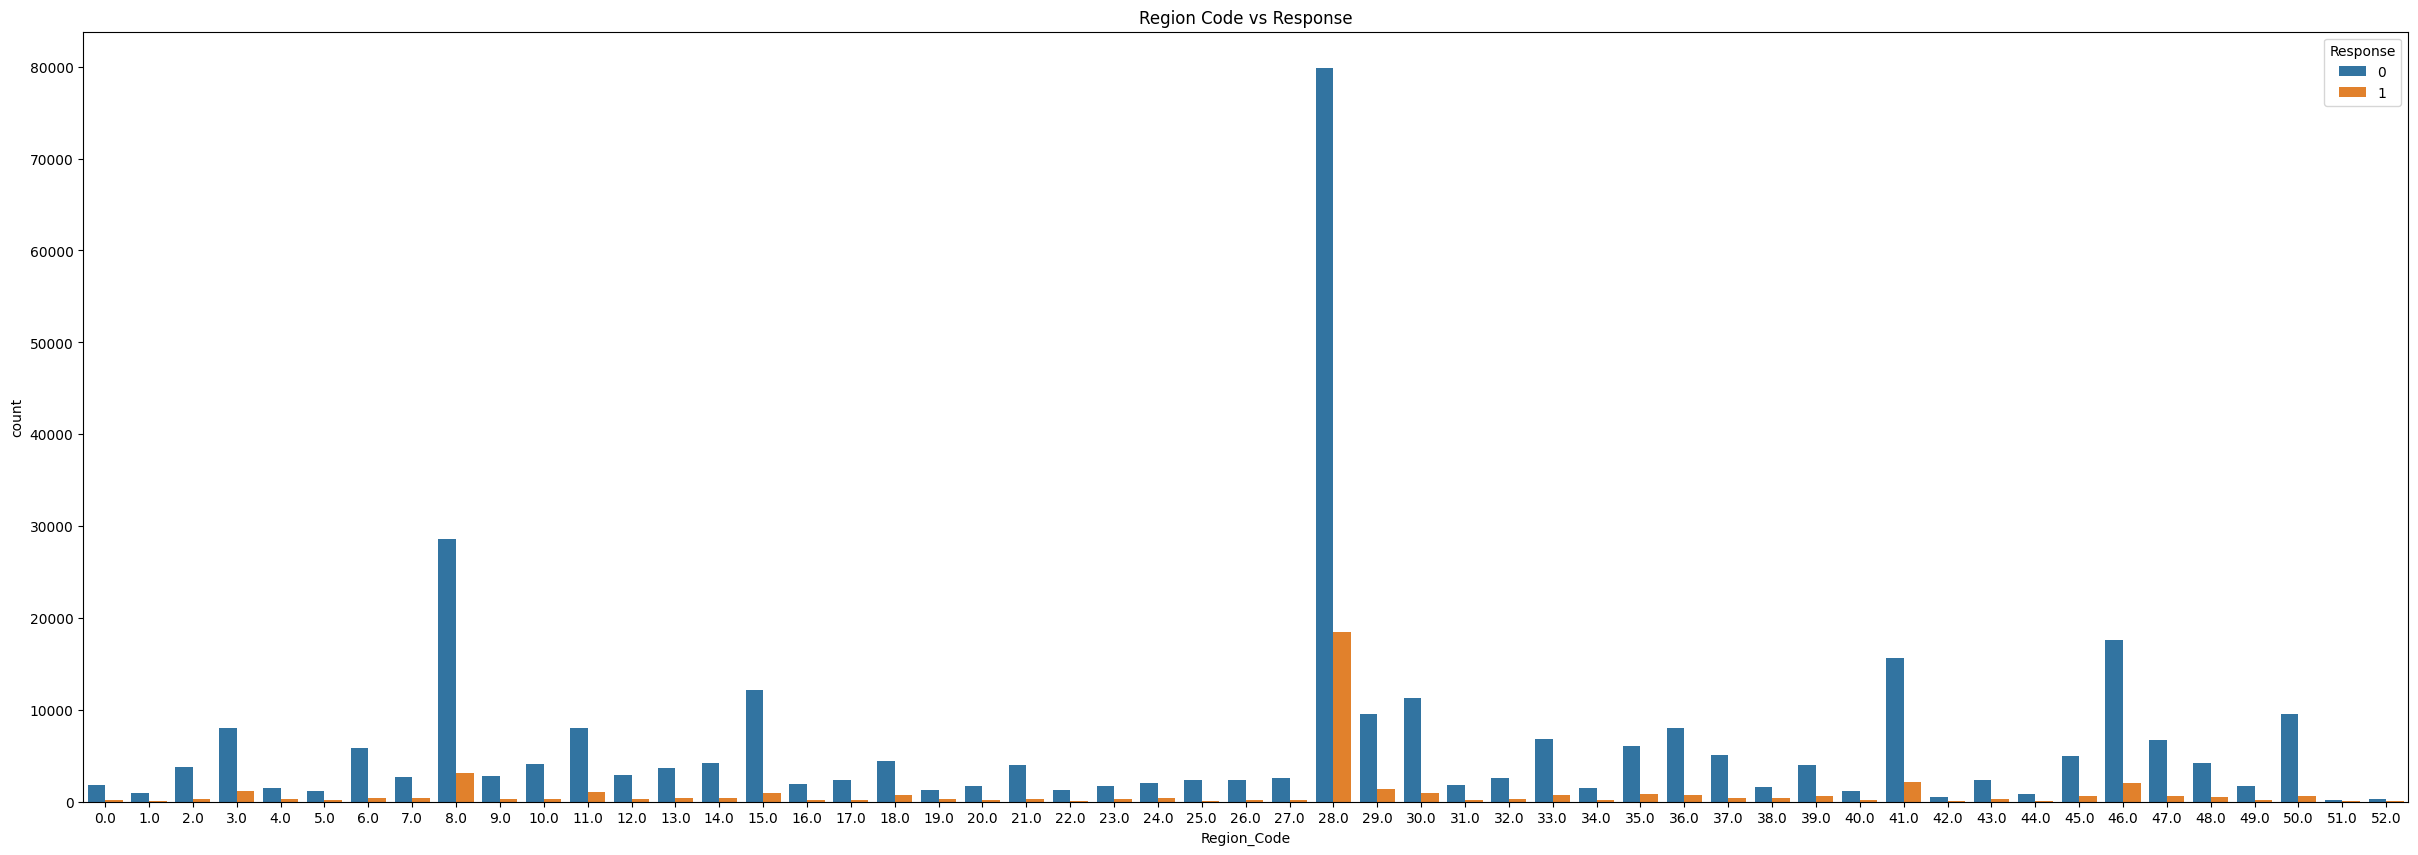

In [87]:
#Region vs Response
plt.figure(figsize=(30, 10))
sns.countplot(x='Region_Code', hue='Response', data=df)
plt.title('Region Code vs Response')
plt.show()

 Policy Analysis:
 Explore the distribution and impact of different insurance policy types.

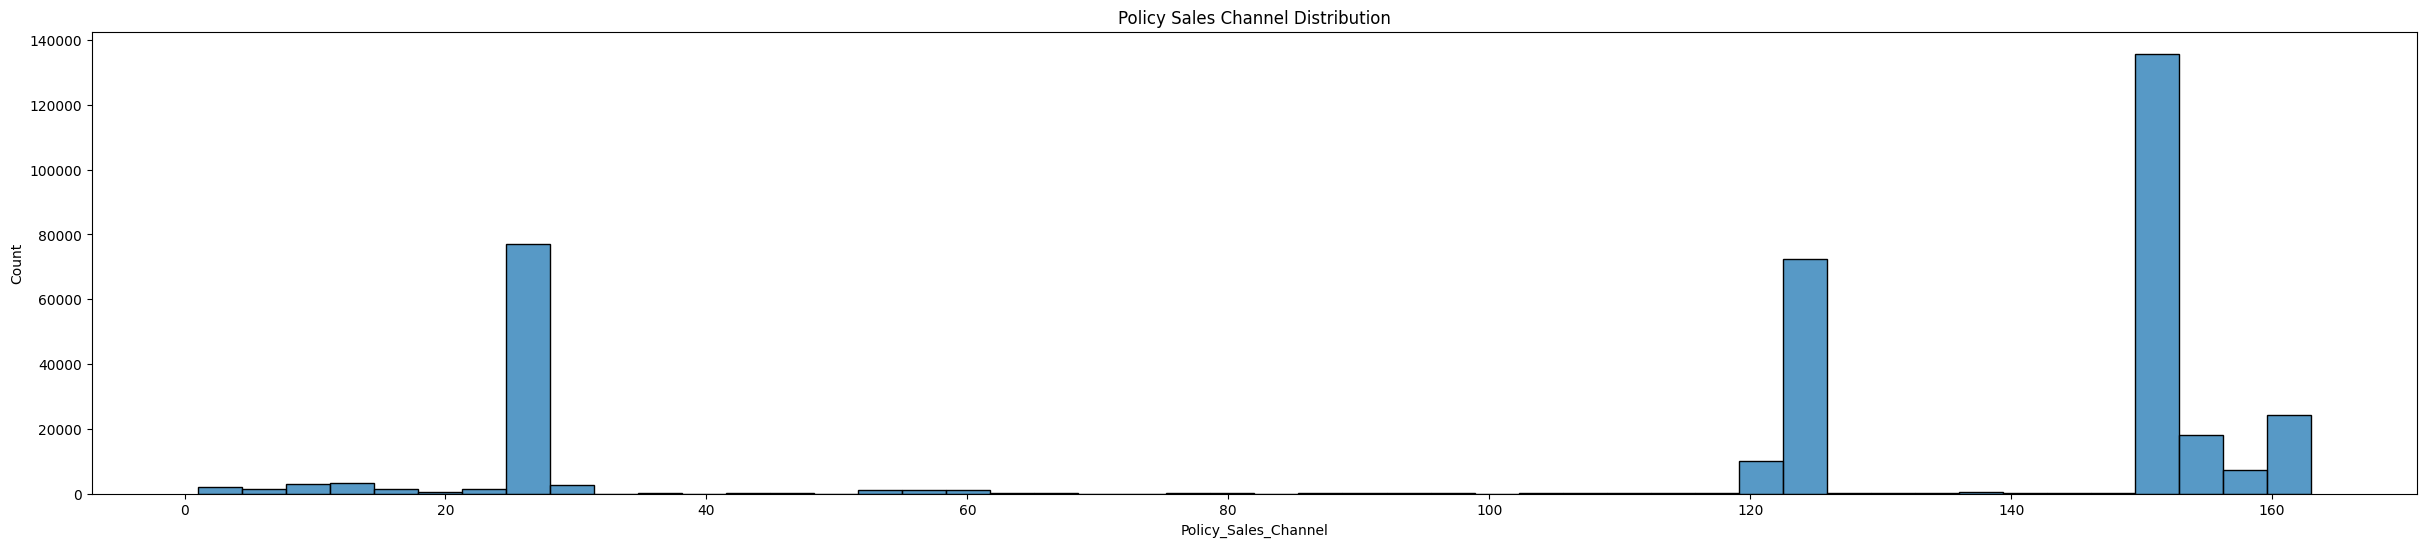

In [91]:
#exploring distribution
plt.figure(figsize=(30, 6))
sns.histplot(x='Policy_Sales_Channel', data=df)
plt.title('Policy Sales Channel Distribution')
plt.show()

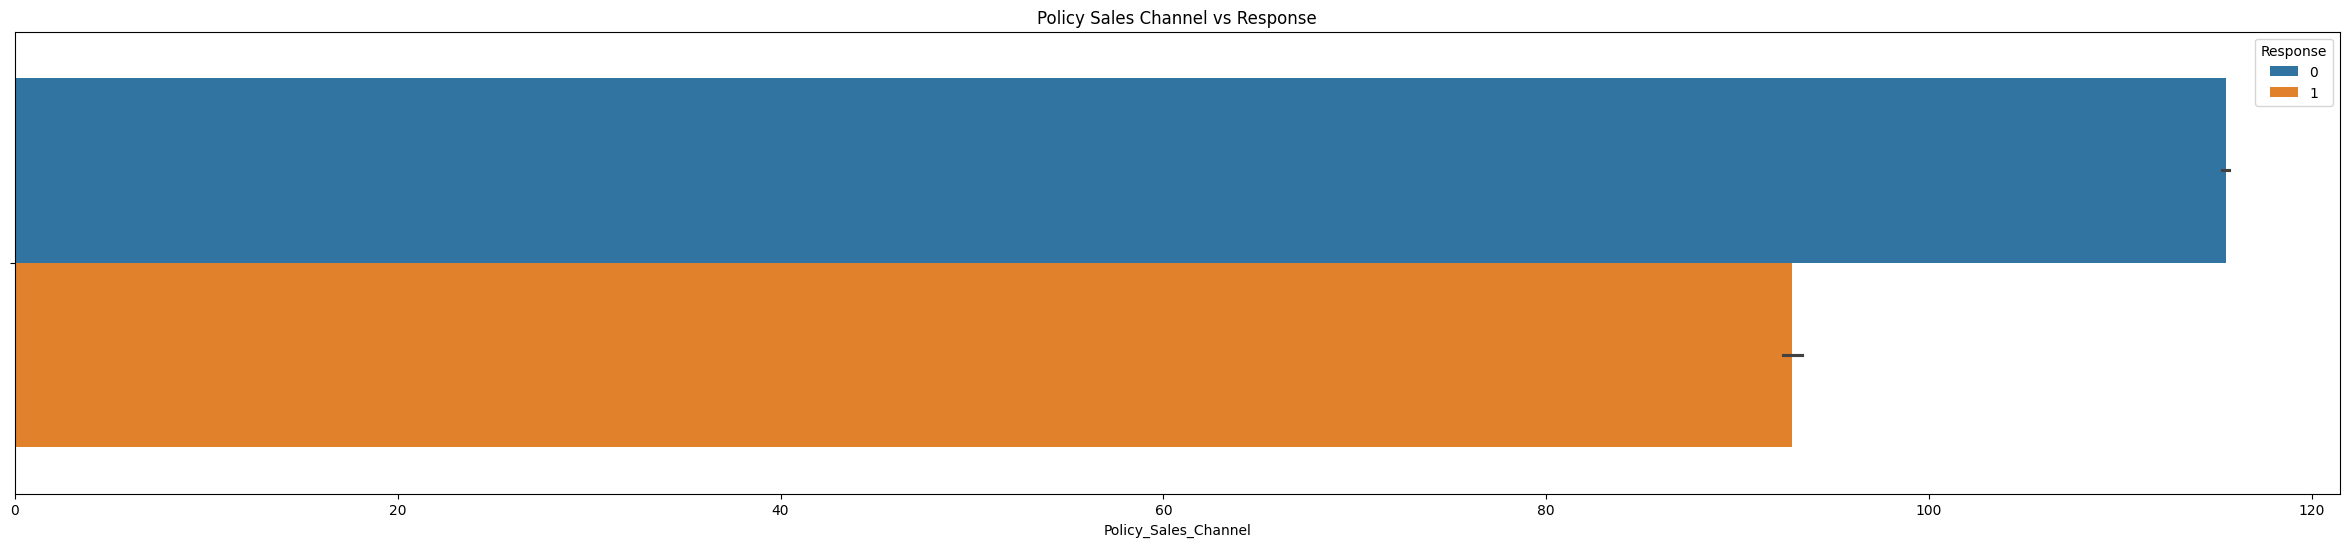

In [93]:
#impact of different insurance policy types.
plt.figure(figsize=(30, 6))
sns.barplot(x='Policy_Sales_Channel', hue='Response', data=df)
plt.title('Policy Sales Channel vs Response')
plt.show()

Claim Frequency by Vehicle Damage:
 Investigate the relationship between vehicle damage and claim frequencies.

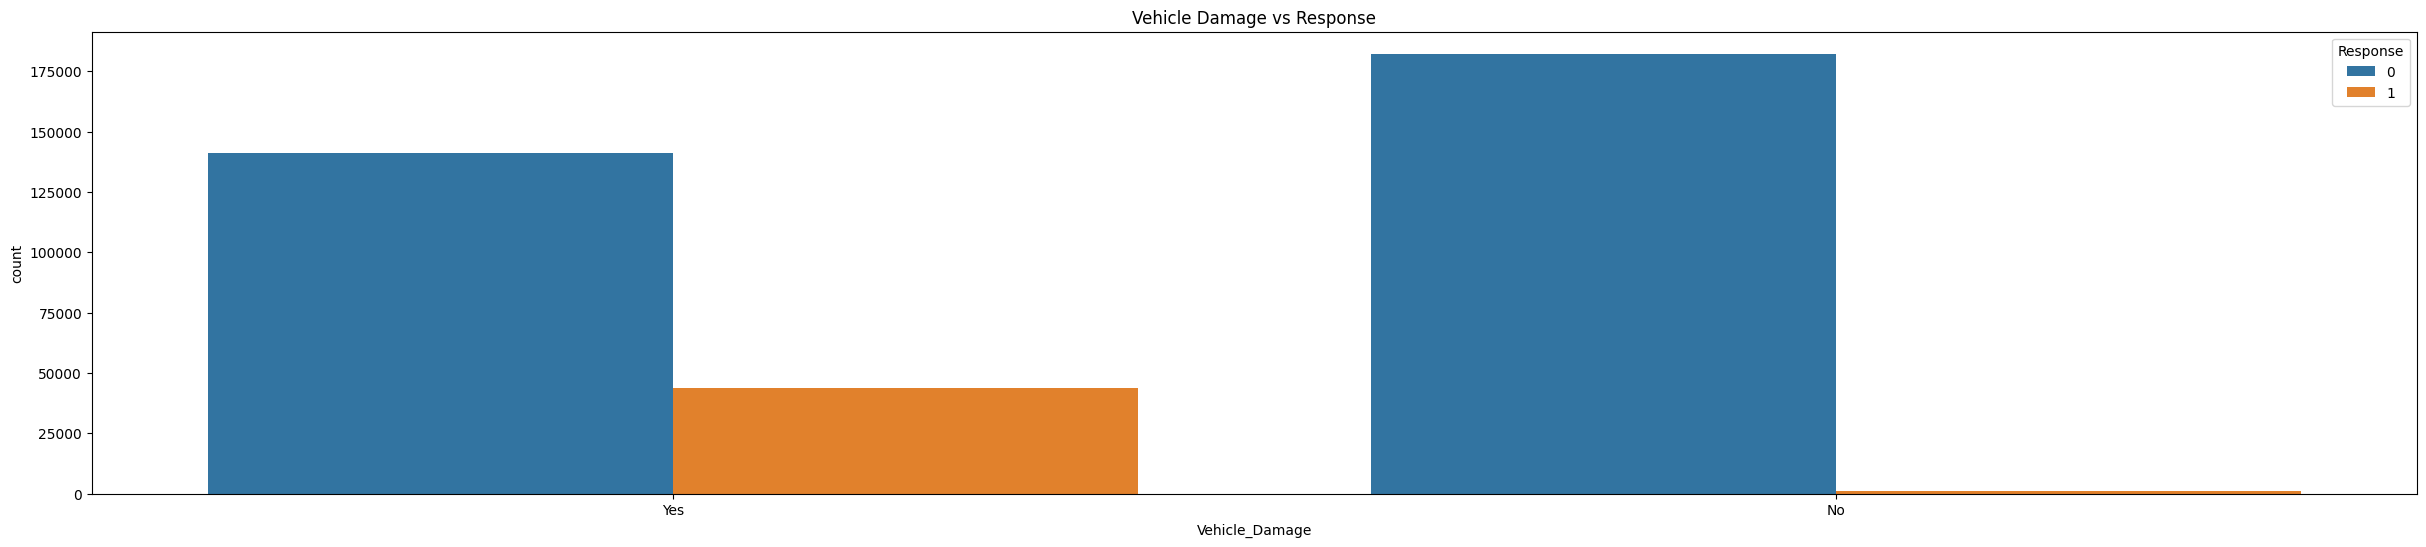

In [94]:
plt.figure(figsize=(30, 6))
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.title('Vehicle Damage vs Response')
plt.show()

 Customer Loyalty:
 Analyze if the number of policies held by a customer influences claim
 likelihood.

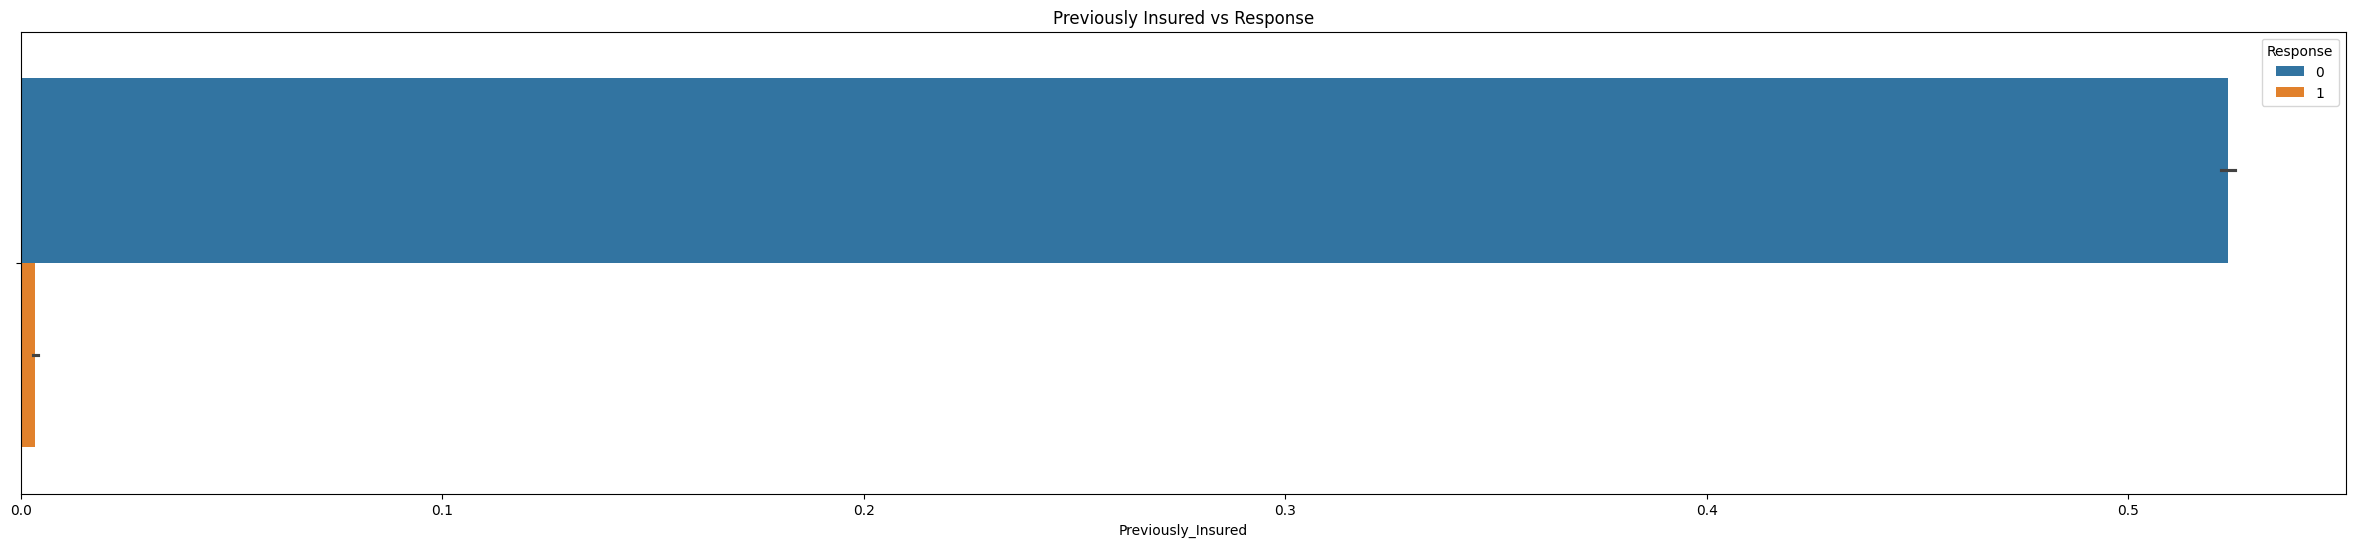

In [95]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Previously_Insured', hue='Response', data=df)
plt.title('Previously Insured vs Response')
plt.show()